# Hamilton-Jacobi-Bellman (HJB) Equation Notebook
Generated by Anthropic's AI Claude

## Overview
The Hamilton-Jacobi-Bellman (HJB) equation is a central concept in optimal control theory and dynamic programming. It provides a necessary condition for optimality in continuous-time optimization problems.

## Key Concepts
1. **Purpose**: Describes the optimal cost-to-go function in a dynamic system.

2. **Applications**:
   - Control theory
   - Economics
   - Financial mathematics

3. **Formulation**: A partial differential equation (PDE) that relates the optimal value function to the system dynamics and cost function.

4. **General Form**:
   -∂V/∂t = min[H(x, ∇V, u, t)]

5. **Solution**: Solving the HJB equation yields the optimal control policy and the optimal value function.

6. **Challenges**: Often difficult to solve analytically; numerical methods are frequently employed.

7. **Relation to Other Concepts**:
   - Generalizes the Hamilton-Jacobi equation from classical mechanics
   - Closely related to the Bellman equation in discrete-time problems

8. **Importance**:
   - Fundamental in solving continuous-time stochastic control problems
   - Crucial in the development of reinforcement learning algorithms

9. **Extensions**: Can be adapted for various types of control problems, including stochastic and constrained optimization.

## Glossary of Terms and Math Symbols
| Term/Symbol | Definition |
|-------------|------------|
| V | Value function |
| H | Hamiltonian |
| x | State variable |
| u | Control variable |
| t | Time |
| ∂ | Partial derivative symbol |
| ∇V | Gradient of the value function |
| min | Minimization operator |
| ∂V/∂t | Partial derivative of V with respect to t |

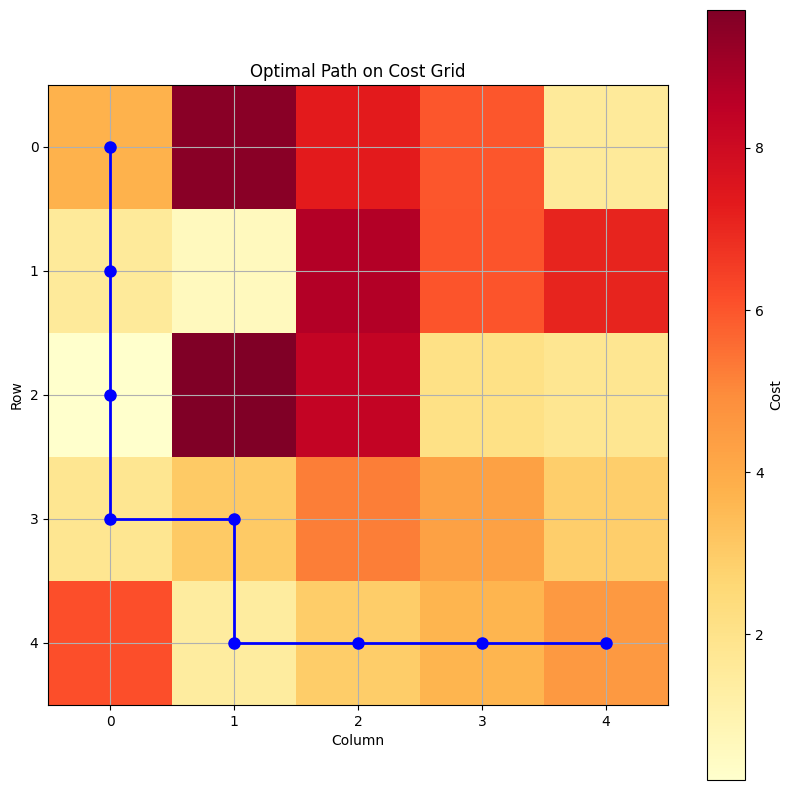

Optimal cost: 22.93


In [ ]:
# Discrete HJB Example: Optimal Path Finding

# Abstract
'''
Discrete HJB Example: Optimal Path Finding

This example demonstrates a simple discrete version of the Hamilton-Jacobi-Bellman (HJB) equation applied
to a path-finding problem. We consider a 5x5 grid where an agent must navigate from the top-left corner to the
bottom-right corner while minimizing the total cost. Each cell in the grid has an associated cost, and the agent
can move right or down at each step. The problem is solved using dynamic programming, which is the discrete-time equivalent
of solving the HJB equation. The optimal path is then plotted on a 5x5 grid.
'''

## Python Implementation

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
GRID_SIZE = 5

# Create a random cost grid
np.random.seed(42)
cost_grid = np.random.rand(GRID_SIZE, GRID_SIZE) * 10

# Initialize the value function grid
value_function = np.zeros((GRID_SIZE, GRID_SIZE))

# Define possible actions: right (0) and down (1)
actions = [0, 1]

# Dynamic programming to compute the optimal value function
for i in range(GRID_SIZE - 1, -1, -1):
    for j in range(GRID_SIZE - 1, -1, -1):
        if i == GRID_SIZE - 1 and j == GRID_SIZE - 1:
            # Bottom-right corner: terminal state
            value_function[i, j] = cost_grid[i, j]
        elif i == GRID_SIZE - 1:
            # Bottom row: can only move right
            value_function[i, j] = cost_grid[i, j] + value_function[i, j+1]
        elif j == GRID_SIZE - 1:
            # Rightmost column: can only move down
            value_function[i, j] = cost_grid[i, j] + value_function[i+1, j]
        else:
            # General case: choose minimum cost between moving right or down
            value_function[i, j] = cost_grid[i, j] + min(value_function[i, j+1], value_function[i+1, j])

# Function to find the optimal path
def find_optimal_path():
    path = [(0, 0)]
    i, j = 0, 0
    while i < GRID_SIZE - 1 or j < GRID_SIZE - 1:
        if i == GRID_SIZE - 1:
            j += 1
        elif j == GRID_SIZE - 1:
            i += 1
        else:
            if value_function[i, j+1] < value_function[i+1, j]:
                j += 1
            else:
                i += 1
        path.append((i, j))
    return path

# Find the optimal path
optimal_path = find_optimal_path()

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(cost_grid, cmap='YlOrRd')
plt.colorbar(label='Cost')
plt.title('Optimal Path on Cost Grid')

# Plot the optimal path
path_y, path_x = zip(*optimal_path)
plt.plot(path_x, path_y, '-o', color='blue', linewidth=2, markersize=8)

plt.xlabel('Column')
plt.ylabel('Row')
plt.grid(True)
plt.show()

# Print the optimal cost
print(f"Optimal cost: {value_function[0, 0]:.2f}")